환경

- MAC OS 
- vscode 
    - kernel : python 3.9.6

In [1]:
# 라이브러리
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [2]:
##출력 영상에 한글표시
plt.rcParams['font.family'] = 'AppleGothic'

In [3]:
# train_data불러오기
train_data = pd.read_csv("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/train_data_modified.csv")

- 컬럼명세
    - GID: 격자번호
    - DATE: 일자
    - TIME: 시간(시)
    - RIDE_DEMAND: 승차 수요 **(Target Variable)**
    - ALIGHT_DEMAND: 하차 수요
    - (주의) 하차수요가 아닌 승차수요를 예측하는 모델을 제출하여야 함

In [4]:
train_data.shape

(539490, 5)

In [5]:
### 결측치 없음
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539490 entries, 0 to 539489
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gid            539490 non-null  object
 1   DATE           539490 non-null  object
 2   TIME           539490 non-null  int64 
 3   RIDE_DEMAND    539490 non-null  int64 
 4   ALIGHT_DEMAND  539490 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 20.6+ MB


In [6]:
train_data.describe()

,TIME,RIDE_DEMAND,ALIGHT_DEMAND
count,539490.000000,539490.000000,539490.000000
mean,12.714286,39.199524,39.179217
std,6.547582,106.844929,112.895851
min,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000
50%,13.000000,1.000000,1.000000
75%,18.000000,28.000000,26.000000
max,23.000000,2485.000000,3121.000000


In [7]:
### 시간은 05시부터 익일 01시까지 1시간 단위로 존재
train_data['TIME'].value_counts()

5     25690
16    25690
0     25690
23    25690
22    25690
21    25690
20    25690
19    25690
18    25690
17    25690
15    25690
6     25690
14    25690
13    25690
12    25690
11    25690
10    25690
9     25690
8     25690
7     25690
1     25690
Name: TIME, dtype: int64

/var/folders/4m/6672_w8j76j43pwh7nzp965w0000gn/T/ipykernel_16121/2493131757.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_date = train_data.groupby('DATE').sum()


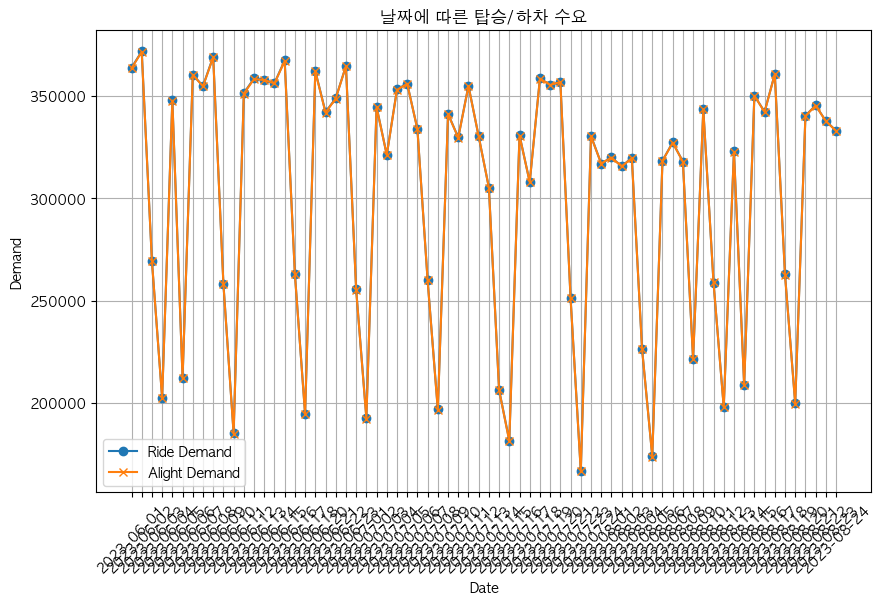

In [8]:
## 날짜에 따른 승차와 하차 추이 그래프
grouped_date = train_data.groupby('DATE').sum()

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.plot(grouped_date.index, grouped_date['RIDE_DEMAND'], label='Ride Demand', marker='o')
plt.plot(grouped_date.index, grouped_date['ALIGHT_DEMAND'], label='Alight Demand', marker='x')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('날짜에 따른 탑승/하차 수요')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

위 그래프에서 그래프의 패턴이 반복된다는 것을 대략적으로 알 수 있음

/var/folders/4m/6672_w8j76j43pwh7nzp965w0000gn/T/ipykernel_16121/1024884577.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_time = train_data.groupby('TIME').sum()


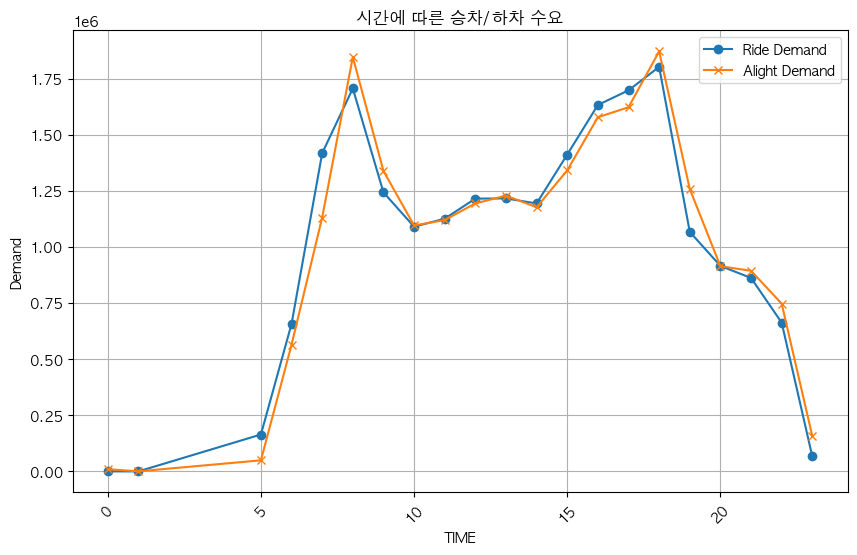

In [9]:
## 시간에 따른 승차와 하차 추이 그래프
grouped_time = train_data.groupby('TIME').sum()

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.plot(grouped_time.index, grouped_time['RIDE_DEMAND'], label='Ride Demand', marker='o')
plt.plot(grouped_time.index, grouped_time['ALIGHT_DEMAND'], label='Alight Demand', marker='x')
plt.xlabel('TIME')
plt.ylabel('Demand')
plt.title('시간에 따른 승차/하차 수요')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

특정 시간대에 수요가 급증/하락한다는 것을 알 수 있음

In [10]:
# DATE 열을 날짜 형식으로 변환
train_data['DATE'] = pd.to_datetime(train_data['DATE'])

# 날짜로부터 요일을 추출하여 요일 열을 추가
train_data['DAY_OF_WEEK'] = train_data['DATE'].dt.day_name()

# 데이터프레임 출력
train_data

,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,DAY_OF_WEEK
0,다마9599,2023-06-01,5,1,0,Thursday
1,다마9599,2023-06-01,6,2,5,Thursday
2,다마9599,2023-06-01,7,2,7,Thursday
3,다마9599,2023-06-01,8,3,12,Thursday
4,다마9599,2023-06-01,9,2,31,Thursday
...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21,0,1,Thursday
539486,라바0421,2023-08-24,22,0,0,Thursday
539487,라바0421,2023-08-24,23,0,0,Thursday
539488,라바0421,2023-08-24,0,0,0,Thursday


/var/folders/4m/6672_w8j76j43pwh7nzp965w0000gn/T/ipykernel_16121/199176529.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_week = train_data.groupby('DAY_OF_WEEK').sum()


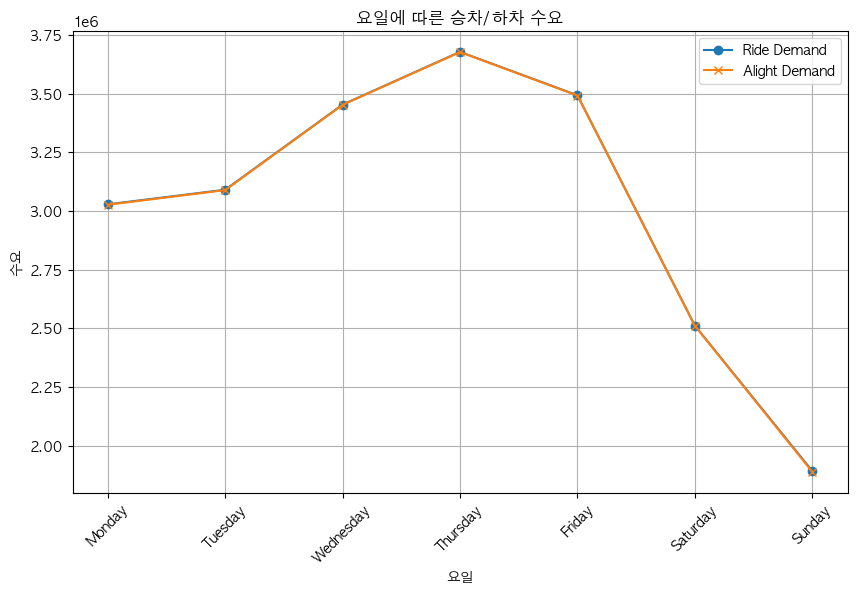

In [11]:
# 주어진 데이터프레임에서 'DAY_OF_WEEK' 열을 Categorical 데이터 타입으로 변환하고 요일 순서를 지정합니다.
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
train_data['DAY_OF_WEEK'] = pd.Categorical(train_data['DAY_OF_WEEK'], categories=weekday_order, ordered=True)

# 'DAY_OF_WEEK' 열을 기준으로 그룹화하여 합계를 계산합니다.
grouped_week = train_data.groupby('DAY_OF_WEEK').sum()

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.plot(grouped_week.index, grouped_week['RIDE_DEMAND'], label='Ride Demand', marker='o')
plt.plot(grouped_week.index, grouped_week['ALIGHT_DEMAND'], label='Alight Demand', marker='x')
plt.xlabel('요일')
plt.ylabel('수요')
plt.title('요일에 따른 승차/하차 수요')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

특정 요일에 수요가 가장 많고 적음을 알 수 있음

/var/folders/4m/6672_w8j76j43pwh7nzp965w0000gn/T/ipykernel_16121/2157300534.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_gid = train_data.groupby('gid').sum()


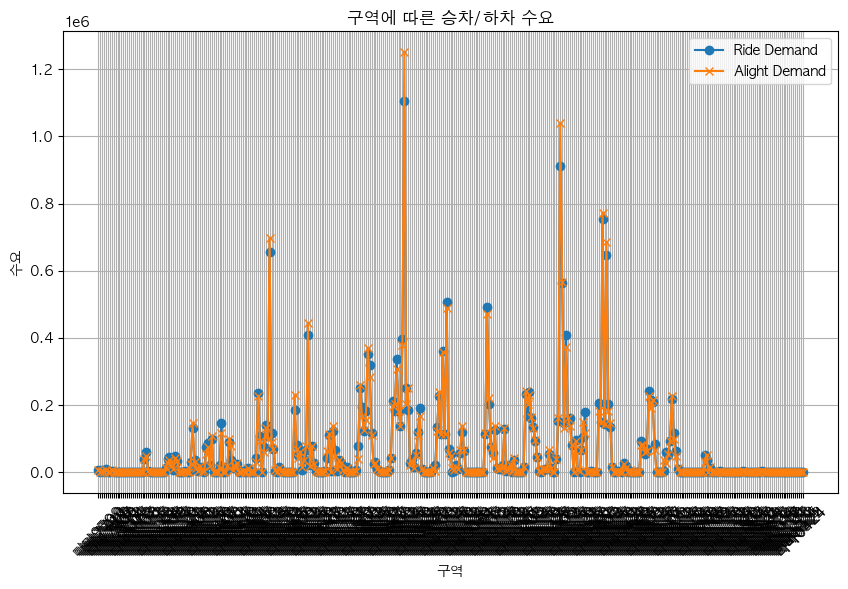

In [12]:
# 'DAY_OF_WEEK' 열을 기준으로 그룹화하여 합계를 계산합니다.
grouped_gid = train_data.groupby('gid').sum()

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.plot(grouped_gid.index, grouped_gid['RIDE_DEMAND'], label='Ride Demand', marker='o')
plt.plot(grouped_gid.index, grouped_gid['ALIGHT_DEMAND'], label='Alight Demand', marker='x')
plt.xlabel('구역')
plt.ylabel('수요')
plt.title('구역에 따른 승차/하차 수요')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

x축이 너무 많아 보이지 않지만 특정 지역에서 수요가 많은것을 알 수 있다

위의 그래프틀을 통해서 대중교통 탑승 수요는 **특정요일, 시간, 구역**이 많은 영향을 끼칠 것이라는 예측을 할 수 있다.

---

In [13]:
# 날씨 데이터 불러오기
weahter_data = pd.read_csv("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/OBS_ASOS_TIM_20231125142449.csv", encoding= 'cp949')

In [14]:
weahter_data.shape

(2256, 38)

In [15]:
weahter_data

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,133,대전,2023-05-31 00:00,19.8,NaN,NaN,NaN,3.1,NaN,140,...,NaN,5000,NaN,NaN,19.0,NaN,22.4,23.1,23.7,22.7
1,133,대전,2023-05-31 01:00,19.2,NaN,NaN,NaN,2.0,NaN,90,...,57.0,5000,NaN,NaN,18.7,NaN,21.9,22.8,23.5,22.6
2,133,대전,2023-05-31 02:00,18.3,NaN,NaN,NaN,3.1,NaN,140,...,57.0,5000,NaN,NaN,18.1,NaN,21.4,22.5,23.2,22.5
3,133,대전,2023-05-31 03:00,17.3,NaN,NaN,NaN,2.7,NaN,110,...,NaN,5000,NaN,NaN,17.1,NaN,20.8,22.1,23.0,22.4
4,133,대전,2023-05-31 04:00,16.9,NaN,NaN,NaN,2.8,NaN,140,...,NaN,5000,NaN,NaN,16.3,NaN,20.3,21.8,22.8,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,133,대전,2023-09-01 19:00,24.6,NaN,NaN,NaN,2.3,NaN,340,...,NaN,5000,NaN,NaN,24.9,NaN,28.5,29.0,28.7,27.4
2252,133,대전,2023-09-01 20:00,22.8,NaN,NaN,NaN,1.5,NaN,340,...,NaN,3831,NaN,NaN,23.3,NaN,27.7,28.4,28.6,27.5
2253,133,대전,2023-09-01 21:00,22.4,NaN,NaN,NaN,0.4,NaN,0,...,NaN,3820,NaN,NaN,22.6,NaN,26.9,28.0,28.4,27.6
2254,133,대전,2023-09-01 22:00,22.3,NaN,NaN,NaN,2.2,NaN,20,...,NaN,4852,NaN,NaN,21.9,NaN,26.4,27.5,28.2,27.6


In [16]:
# 데이터프레임에서 '일시' 열을 날짜 형식으로 변환
weahter_data['일시'] = pd.to_datetime(weahter_data['일시'])

In [17]:
# '일시' 열을 날짜와 시간으로 나누기
weahter_data['일시'] = pd.to_datetime(weahter_data['일시'])  # '일시' 열을 datetime 형식으로 변환
weahter_data['날짜'] = weahter_data['일시'].dt.date  # '날짜' 열 추가
weahter_data['시간'] = weahter_data['일시'].dt.time  # '시간' 열 추가
weahter_data

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),날짜,시간
0,133,대전,2023-05-31 00:00:00,19.8,NaN,NaN,NaN,3.1,NaN,140,...,NaN,NaN,19.0,NaN,22.4,23.1,23.7,22.7,2023-05-31,00:00:00
1,133,대전,2023-05-31 01:00:00,19.2,NaN,NaN,NaN,2.0,NaN,90,...,NaN,NaN,18.7,NaN,21.9,22.8,23.5,22.6,2023-05-31,01:00:00
2,133,대전,2023-05-31 02:00:00,18.3,NaN,NaN,NaN,3.1,NaN,140,...,NaN,NaN,18.1,NaN,21.4,22.5,23.2,22.5,2023-05-31,02:00:00
3,133,대전,2023-05-31 03:00:00,17.3,NaN,NaN,NaN,2.7,NaN,110,...,NaN,NaN,17.1,NaN,20.8,22.1,23.0,22.4,2023-05-31,03:00:00
4,133,대전,2023-05-31 04:00:00,16.9,NaN,NaN,NaN,2.8,NaN,140,...,NaN,NaN,16.3,NaN,20.3,21.8,22.8,22.3,2023-05-31,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,133,대전,2023-09-01 19:00:00,24.6,NaN,NaN,NaN,2.3,NaN,340,...,NaN,NaN,24.9,NaN,28.5,29.0,28.7,27.4,2023-09-01,19:00:00
2252,133,대전,2023-09-01 20:00:00,22.8,NaN,NaN,NaN,1.5,NaN,340,...,NaN,NaN,23.3,NaN,27.7,28.4,28.6,27.5,2023-09-01,20:00:00
2253,133,대전,2023-09-01 21:00:00,22.4,NaN,NaN,NaN,0.4,NaN,0,...,NaN,NaN,22.6,NaN,26.9,28.0,28.4,27.6,2023-09-01,21:00:00
2254,133,대전,2023-09-01 22:00:00,22.3,NaN,NaN,NaN,2.2,NaN,20,...,NaN,NaN,21.9,NaN,26.4,27.5,28.2,27.6,2023-09-01,22:00:00


In [18]:
weahter_data.drop('일시', axis=1, inplace=True)

In [19]:
# '날짜'와 '시간' 열을 문자열로 변환
weahter_data['날짜'] = weahter_data['날짜'].astype(str)
weahter_data['시간'] = weahter_data['시간'].astype(str)

In [20]:
weahter_data = weahter_data[['기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','날짜','시간']]
weahter_data

,기온(°C),강수량(mm),풍속(m/s),습도(%),날짜,시간
0,19.8,NaN,3.1,68,2023-05-31,00:00:00
1,19.2,NaN,2.0,68,2023-05-31,01:00:00
2,18.3,NaN,3.1,70,2023-05-31,02:00:00
3,17.3,NaN,2.7,69,2023-05-31,03:00:00
4,16.9,NaN,2.8,68,2023-05-31,04:00:00
...,...,...,...,...,...,...
2251,24.6,NaN,2.3,64,2023-09-01,19:00:00
2252,22.8,NaN,1.5,76,2023-09-01,20:00:00
2253,22.4,NaN,0.4,74,2023-09-01,21:00:00
2254,22.3,NaN,2.2,70,2023-09-01,22:00:00


In [21]:
weahter_data['강수량(mm)'].fillna(0, inplace=True)

/var/folders/4m/6672_w8j76j43pwh7nzp965w0000gn/T/ipykernel_16121/809303828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weahter_data['강수량(mm)'].fillna(0, inplace=True)


In [22]:
weahter_data.rename(columns={'날짜' : 'DATE', '시간' : 'TIME'}, inplace=True)

/var/folders/4m/6672_w8j76j43pwh7nzp965w0000gn/T/ipykernel_16121/2498751380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weahter_data.rename(columns={'날짜' : 'DATE', '시간' : 'TIME'}, inplace=True)


In [23]:
# 'TIME' 열의 데이터를 시간 형식으로 변환
train_data['TIME'] = train_data['TIME'].apply(lambda x: f"{x:02d}:00:00")

In [24]:
# '날짜'와 '시간' 열을 문자열로 변환
train_data['DATE'] = train_data['DATE'].astype(str)

In [25]:
weahter_data.head()

,기온(°C),강수량(mm),풍속(m/s),습도(%),DATE,TIME
0,19.8,0.0,3.1,68,2023-05-31,00:00:00
1,19.2,0.0,2.0,68,2023-05-31,01:00:00
2,18.3,0.0,3.1,70,2023-05-31,02:00:00
3,17.3,0.0,2.7,69,2023-05-31,03:00:00
4,16.9,0.0,2.8,68,2023-05-31,04:00:00


In [26]:
train_data.head()

,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,DAY_OF_WEEK
0,다마9599,2023-06-01,05:00:00,1,0,Thursday
1,다마9599,2023-06-01,06:00:00,2,5,Thursday
2,다마9599,2023-06-01,07:00:00,2,7,Thursday
3,다마9599,2023-06-01,08:00:00,3,12,Thursday
4,다마9599,2023-06-01,09:00:00,2,31,Thursday


In [27]:
# 두 데이터프레임을 'DATE'와 'TIME'을 기준으로 병합
train_data = pd.merge(train_data, weahter_data, on=['DATE', 'TIME'], how='left')
train_data

,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,다마9599,2023-06-01,05:00:00,1,0,Thursday,18.0,0.0,0.1,82
1,다마9599,2023-06-01,06:00:00,2,5,Thursday,18.1,0.0,0.0,81
2,다마9599,2023-06-01,07:00:00,2,7,Thursday,18.9,0.0,0.0,78
3,다마9599,2023-06-01,08:00:00,3,12,Thursday,20.6,0.0,0.0,67
4,다마9599,2023-06-01,09:00:00,2,31,Thursday,22.3,0.0,0.6,56
...,...,...,...,...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21:00:00,0,1,Thursday,24.9,0.2,0.0,91
539486,라바0421,2023-08-24,22:00:00,0,0,Thursday,24.6,0.0,0.0,92
539487,라바0421,2023-08-24,23:00:00,0,0,Thursday,24.6,0.0,0.2,91
539488,라바0421,2023-08-24,00:00:00,0,0,Thursday,23.9,14.4,1.6,96


날씨데이터를 불러와서 날짜와 시간에 맞게 **기온, 강수량, 풍속, 습도**를 넣음

- 날씨가 탑승 수요예 영향을 끼칠것이라는 예측

---

In [28]:
# 휴일 날짜 리스트
holiday_dates = ['2023-06-06', '2023-07-17', '2023-08-15']

# 'HOLIDAY' 열 추가
train_data['HOLIDAY'] = (train_data['DATE'].isin(holiday_dates)).astype(int)


In [29]:
train_data.head()

,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY
0,다마9599,2023-06-01,05:00:00,1,0,Thursday,18.0,0.0,0.1,82,0
1,다마9599,2023-06-01,06:00:00,2,5,Thursday,18.1,0.0,0.0,81,0
2,다마9599,2023-06-01,07:00:00,2,7,Thursday,18.9,0.0,0.0,78,0
3,다마9599,2023-06-01,08:00:00,3,12,Thursday,20.6,0.0,0.0,67,0
4,다마9599,2023-06-01,09:00:00,2,31,Thursday,22.3,0.0,0.6,56,0


- 공휴일이 탑승 수요에 영향을 미칠것이라는 예측

---

In [30]:
# 출퇴근 시간 리스트
commute_time = ['06:00:00', '07:00:00', '08:00:00','15:00:00','16:00:00','17:00:00','18:00:00']

# 'commute_time' 열 추가
train_data['commute_time'] = (train_data['TIME'].isin(commute_time)).astype(int)


In [31]:
train_data.head()

,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time
0,다마9599,2023-06-01,05:00:00,1,0,Thursday,18.0,0.0,0.1,82,0,0
1,다마9599,2023-06-01,06:00:00,2,5,Thursday,18.1,0.0,0.0,81,0,1
2,다마9599,2023-06-01,07:00:00,2,7,Thursday,18.9,0.0,0.0,78,0,1
3,다마9599,2023-06-01,08:00:00,3,12,Thursday,20.6,0.0,0.0,67,0,1
4,다마9599,2023-06-01,09:00:00,2,31,Thursday,22.3,0.0,0.6,56,0,0


출퇴근 시간이 탑승 수요에 영향을 끼칠것이라고 예측, 출근시간(06시 ~ 08시) / 퇴근시간(15시 ~ 18시) 예측

---

In [32]:
train_data['VACATION'] = (pd.to_datetime(train_data['DATE']) > '2023-06-20').astype(int)

In [33]:
train_data.head()


,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION
0,다마9599,2023-06-01,05:00:00,1,0,Thursday,18.0,0.0,0.1,82,0,0,0
1,다마9599,2023-06-01,06:00:00,2,5,Thursday,18.1,0.0,0.0,81,0,1,0
2,다마9599,2023-06-01,07:00:00,2,7,Thursday,18.9,0.0,0.0,78,0,1,0
3,다마9599,2023-06-01,08:00:00,3,12,Thursday,20.6,0.0,0.0,67,0,1,0
4,다마9599,2023-06-01,09:00:00,2,31,Thursday,22.3,0.0,0.6,56,0,0,0


학생들의 방학 여부가 탑승 수요에 영향을 끼칠수 있을것이라고 예측
- 한남대 기준 6월 20일 이후 방학이라고 가정

---

In [34]:
## 공연 전시 축제 데이터 불러오기
event_data = pd.read_csv("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/축제추가.csv")

In [35]:
event_data.head()

,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival
0,다마9599,2023-06-01,5,1,0,0,0,0,0,0
1,다마9599,2023-06-01,6,2,5,0,0,0,0,0
2,다마9599,2023-06-01,7,2,7,0,0,0,0,0
3,다마9599,2023-06-01,8,3,12,0,0,0,0,0
4,다마9599,2023-06-01,9,2,31,0,0,0,0,0


In [36]:
train_data.head()

,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION
0,다마9599,2023-06-01,05:00:00,1,0,Thursday,18.0,0.0,0.1,82,0,0,0
1,다마9599,2023-06-01,06:00:00,2,5,Thursday,18.1,0.0,0.0,81,0,1,0
2,다마9599,2023-06-01,07:00:00,2,7,Thursday,18.9,0.0,0.0,78,0,1,0
3,다마9599,2023-06-01,08:00:00,3,12,Thursday,20.6,0.0,0.0,67,0,1,0
4,다마9599,2023-06-01,09:00:00,2,31,Thursday,22.3,0.0,0.6,56,0,0,0


In [37]:
event_data['TIME'] = event_data['TIME'].apply(lambda x: f"{x:02d}:00:00")

In [38]:
train_data = pd.merge(train_data, event_data, on=['gid', 'DATE', 'TIME'], how='left')

In [39]:
train_data

,gid,DATE,TIME,RIDE_DEMAND_x,ALIGHT_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,RIDE_DEMAND_y,ALIGHT_DEMAND_y,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival
0,다마9599,2023-06-01,05:00:00,1,0,Thursday,18.0,0.0,0.1,82,0,0,0,1,0,0,0,0,0,0
1,다마9599,2023-06-01,06:00:00,2,5,Thursday,18.1,0.0,0.0,81,0,1,0,2,5,0,0,0,0,0
2,다마9599,2023-06-01,07:00:00,2,7,Thursday,18.9,0.0,0.0,78,0,1,0,2,7,0,0,0,0,0
3,다마9599,2023-06-01,08:00:00,3,12,Thursday,20.6,0.0,0.0,67,0,1,0,3,12,0,0,0,0,0
4,다마9599,2023-06-01,09:00:00,2,31,Thursday,22.3,0.0,0.6,56,0,0,0,2,31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21:00:00,0,1,Thursday,24.9,0.2,0.0,91,0,0,1,0,1,0,0,3,3,0
539486,라바0421,2023-08-24,22:00:00,0,0,Thursday,24.6,0.0,0.0,92,0,0,1,0,0,0,0,2,2,0
539487,라바0421,2023-08-24,23:00:00,0,0,Thursday,24.6,0.0,0.2,91,0,0,1,0,0,0,0,0,0,0
539488,라바0421,2023-08-24,00:00:00,0,0,Thursday,23.9,14.4,1.6,96,0,0,1,0,0,0,0,0,0,0


In [40]:
train_data.drop(['RIDE_DEMAND_y','ALIGHT_DEMAND_y'], axis=1, inplace=True)

In [41]:
train_data

,gid,DATE,TIME,RIDE_DEMAND_x,ALIGHT_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival
0,다마9599,2023-06-01,05:00:00,1,0,Thursday,18.0,0.0,0.1,82,0,0,0,0,0,0,0,0
1,다마9599,2023-06-01,06:00:00,2,5,Thursday,18.1,0.0,0.0,81,0,1,0,0,0,0,0,0
2,다마9599,2023-06-01,07:00:00,2,7,Thursday,18.9,0.0,0.0,78,0,1,0,0,0,0,0,0
3,다마9599,2023-06-01,08:00:00,3,12,Thursday,20.6,0.0,0.0,67,0,1,0,0,0,0,0,0
4,다마9599,2023-06-01,09:00:00,2,31,Thursday,22.3,0.0,0.6,56,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21:00:00,0,1,Thursday,24.9,0.2,0.0,91,0,0,1,0,0,3,3,0
539486,라바0421,2023-08-24,22:00:00,0,0,Thursday,24.6,0.0,0.0,92,0,0,1,0,0,2,2,0
539487,라바0421,2023-08-24,23:00:00,0,0,Thursday,24.6,0.0,0.2,91,0,0,1,0,0,0,0,0
539488,라바0421,2023-08-24,00:00:00,0,0,Thursday,23.9,14.4,1.6,96,0,0,1,0,0,0,0,0


지역 **축제, 전시, 공연**이 탑승 수요에 영향을 끼칠것이라고 예측

---

In [42]:
### 대전 지역 스포츠 경기 일정 불러오기
sports_data = pd.read_excel("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/경기일정_중석수정.xlsx")

In [43]:
sports_data.head()

,장소,date,time
0,한화생명이글스파크,2023-06-01,18
1,한화생명이글스파크,2023-06-02,18
2,한화생명이글스파크,2023-06-03,17
3,한화생명이글스파크,2023-06-04,17
4,한화생명이글스파크,2023-06-09,18


In [44]:
import geopandas as gpd
# 격자 데이터 불러오기
daejeon_geo = gpd.read_file("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/국토통계_인구정보-총 인구 수(전체)-(격자) 1KM_대전광역시_202304 (1)", encoding = "utf-8")
daejeon_geo

,gid,lbl,val,geometry
0,다바8516,16173.00,16173.0,"POLYGON ((985000.000 1816000.000, 985000.000 1..."
1,라바0120,31.00,31.0,"POLYGON ((1001000.000 1820000.000, 1001000.000..."
2,다바9614,14729.00,14729.0,"POLYGON ((996000.000 1814000.000, 996000.000 1..."
3,다바8728,N/A,0.0,"POLYGON ((987000.000 1828000.000, 987000.000 1..."
4,다바9716,79.00,79.0,"POLYGON ((997000.000 1816000.000, 997000.000 1..."
...,...,...,...,...
627,다바8005,NaN,NaN,"POLYGON ((980000.000 1805000.000, 980000.000 1..."
628,다바9508,NaN,NaN,"POLYGON ((995000.000 1808000.000, 995000.000 1..."
629,다바8828,NaN,NaN,"POLYGON ((988000.000 1828000.000, 988000.000 1..."
630,다바8627,NaN,NaN,"POLYGON ((986000.000 1827000.000, 986000.000 1..."


In [45]:
import folium

daejeon_map = folium.Map(location=[36.3504119, 127.3845475],
                 zoom_start=11, control_scale=True)

# Create GeoJson layer with tooltips
folium.GeoJson(
    daejeon_geo,
    tooltip=folium.features.GeoJsonTooltip(fields=['gid'], aliases=['GID'], localize=True)
).add_to(daejeon_map)

daejeon_map

/Users/chojungseok/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


한화이글스파크 = 다바9313

대전월드컵 경기장 = 다바 8418

In [46]:
location = []
for index, row in sports_data.iterrows() :
    if row['장소'] == '한화생명이글스파크' :
        location.append('다바9313')
    else :
        location.append('다바8418')

In [47]:
sports_data['gid'] = location
sports_data.head()

,장소,date,time,gid
0,한화생명이글스파크,2023-06-01,18,다바9313
1,한화생명이글스파크,2023-06-02,18,다바9313
2,한화생명이글스파크,2023-06-03,17,다바9313
3,한화생명이글스파크,2023-06-04,17,다바9313
4,한화생명이글스파크,2023-06-09,18,다바9313


In [48]:
sports_data.rename(columns={'date' : 'DATE', 'time' : 'TIME'},inplace=True)

In [49]:
sports_data['TIME'] = sports_data['TIME'].apply(lambda x: f"{x:02d}:00:00")

In [50]:
# 첫 번째 데이터프레임을 df1, 두 번째 데이터프레임을 df2로 가정합니다.
# 'DATE', 'TIME', 'gid' 열을 기준으로 조건에 따라 'SPORTS' 열을 추가합니다.
train_data['SPORTS'] = train_data.apply(lambda row: 1 if any((sports_data['DATE'] == row['DATE']) & (sports_data['gid'] == row['gid'])) else 0, axis=1)

# 결과 데이터프레임을 출력합니다.
train_data


,gid,DATE,TIME,RIDE_DEMAND_x,ALIGHT_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS
0,다마9599,2023-06-01,05:00:00,1,0,Thursday,18.0,0.0,0.1,82,0,0,0,0,0,0,0,0,0
1,다마9599,2023-06-01,06:00:00,2,5,Thursday,18.1,0.0,0.0,81,0,1,0,0,0,0,0,0,0
2,다마9599,2023-06-01,07:00:00,2,7,Thursday,18.9,0.0,0.0,78,0,1,0,0,0,0,0,0,0
3,다마9599,2023-06-01,08:00:00,3,12,Thursday,20.6,0.0,0.0,67,0,1,0,0,0,0,0,0,0
4,다마9599,2023-06-01,09:00:00,2,31,Thursday,22.3,0.0,0.6,56,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21:00:00,0,1,Thursday,24.9,0.2,0.0,91,0,0,1,0,0,3,3,0,0
539486,라바0421,2023-08-24,22:00:00,0,0,Thursday,24.6,0.0,0.0,92,0,0,1,0,0,2,2,0,0
539487,라바0421,2023-08-24,23:00:00,0,0,Thursday,24.6,0.0,0.2,91,0,0,1,0,0,0,0,0,0
539488,라바0421,2023-08-24,00:00:00,0,0,Thursday,23.9,14.4,1.6,96,0,0,1,0,0,0,0,0,0


In [51]:
# TIME 열에서 시간만 추출하여 새로운 열 생성
train_data['TIME'] = train_data['TIME'].str.split(':').str[0]

In [52]:
train_data

,gid,DATE,TIME,RIDE_DEMAND_x,ALIGHT_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS
0,다마9599,2023-06-01,05,1,0,Thursday,18.0,0.0,0.1,82,0,0,0,0,0,0,0,0,0
1,다마9599,2023-06-01,06,2,5,Thursday,18.1,0.0,0.0,81,0,1,0,0,0,0,0,0,0
2,다마9599,2023-06-01,07,2,7,Thursday,18.9,0.0,0.0,78,0,1,0,0,0,0,0,0,0
3,다마9599,2023-06-01,08,3,12,Thursday,20.6,0.0,0.0,67,0,1,0,0,0,0,0,0,0
4,다마9599,2023-06-01,09,2,31,Thursday,22.3,0.0,0.6,56,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21,0,1,Thursday,24.9,0.2,0.0,91,0,0,1,0,0,3,3,0,0
539486,라바0421,2023-08-24,22,0,0,Thursday,24.6,0.0,0.0,92,0,0,1,0,0,2,2,0,0
539487,라바0421,2023-08-24,23,0,0,Thursday,24.6,0.0,0.2,91,0,0,1,0,0,0,0,0,0
539488,라바0421,2023-08-24,00,0,0,Thursday,23.9,14.4,1.6,96,0,0,1,0,0,0,0,0,0


---

In [53]:
population = gpd.read_file("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/국토통계_인구정보-총 인구 수(전체)-(격자) 1KM_대전광역시_202304 (1)/nlsp_020001001.shp", encoding = 'utf-8')
population

,gid,lbl,val,geometry
0,다바8516,16173.00,16173.0,"POLYGON ((985000.000 1816000.000, 985000.000 1..."
1,라바0120,31.00,31.0,"POLYGON ((1001000.000 1820000.000, 1001000.000..."
2,다바9614,14729.00,14729.0,"POLYGON ((996000.000 1814000.000, 996000.000 1..."
3,다바8728,N/A,0.0,"POLYGON ((987000.000 1828000.000, 987000.000 1..."
4,다바9716,79.00,79.0,"POLYGON ((997000.000 1816000.000, 997000.000 1..."
...,...,...,...,...
627,다바8005,NaN,NaN,"POLYGON ((980000.000 1805000.000, 980000.000 1..."
628,다바9508,NaN,NaN,"POLYGON ((995000.000 1808000.000, 995000.000 1..."
629,다바8828,NaN,NaN,"POLYGON ((988000.000 1828000.000, 988000.000 1..."
630,다바8627,NaN,NaN,"POLYGON ((986000.000 1827000.000, 986000.000 1..."


In [54]:
population.drop(["lbl", 'geometry'], axis=1, inplace=True)

In [55]:
population

,gid,val
0,다바8516,16173.0
1,라바0120,31.0
2,다바9614,14729.0
3,다바8728,0.0
4,다바9716,79.0
...,...,...
627,다바8005,NaN
628,다바9508,NaN
629,다바8828,NaN
630,다바8627,NaN


In [56]:
population.rename(columns={"val" :"인구수"}, inplace = True)

In [57]:
population.head()

,gid,인구수
0,다바8516,16173.0
1,라바0120,31.0
2,다바9614,14729.0
3,다바8728,0.0
4,다바9716,79.0


In [58]:
population['인구수'] = population['인구수'].fillna(0)

In [59]:
population

,gid,인구수
0,다바8516,16173.0
1,라바0120,31.0
2,다바9614,14729.0
3,다바8728,0.0
4,다바9716,79.0
...,...,...
627,다바8005,0.0
628,다바9508,0.0
629,다바8828,0.0
630,다바8627,0.0


In [60]:
train_data = pd.merge(train_data, population, on='gid', how='left')

In [61]:
train_data

,gid,DATE,TIME,RIDE_DEMAND_x,ALIGHT_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS,인구수
0,다마9599,2023-06-01,05,1,0,Thursday,18.0,0.0,0.1,82,0,0,0,0,0,0,0,0,0,0.0
1,다마9599,2023-06-01,06,2,5,Thursday,18.1,0.0,0.0,81,0,1,0,0,0,0,0,0,0,0.0
2,다마9599,2023-06-01,07,2,7,Thursday,18.9,0.0,0.0,78,0,1,0,0,0,0,0,0,0,0.0
3,다마9599,2023-06-01,08,3,12,Thursday,20.6,0.0,0.0,67,0,1,0,0,0,0,0,0,0,0.0
4,다마9599,2023-06-01,09,2,31,Thursday,22.3,0.0,0.6,56,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21,0,1,Thursday,24.9,0.2,0.0,91,0,0,1,0,0,3,3,0,0,0.0
539486,라바0421,2023-08-24,22,0,0,Thursday,24.6,0.0,0.0,92,0,0,1,0,0,2,2,0,0,0.0
539487,라바0421,2023-08-24,23,0,0,Thursday,24.6,0.0,0.2,91,0,0,1,0,0,0,0,0,0,0.0
539488,라바0421,2023-08-24,00,0,0,Thursday,23.9,14.4,1.6,96,0,0,1,0,0,0,0,0,0,0.0


In [65]:
train_data.to_csv("train_data_변수추가.csv", index = False)

---
모델 생성

In [66]:
train = pd.read_csv("train_data_변수추가.csv")

In [67]:
train

,gid,DATE,TIME,RIDE_DEMAND_x,ALIGHT_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS,인구수
0,다마9599,2023-06-01,5,1,0,Thursday,18.0,0.0,0.1,82,0,0,0,0,0,0,0,0,0,0.0
1,다마9599,2023-06-01,6,2,5,Thursday,18.1,0.0,0.0,81,0,1,0,0,0,0,0,0,0,0.0
2,다마9599,2023-06-01,7,2,7,Thursday,18.9,0.0,0.0,78,0,1,0,0,0,0,0,0,0,0.0
3,다마9599,2023-06-01,8,3,12,Thursday,20.6,0.0,0.0,67,0,1,0,0,0,0,0,0,0,0.0
4,다마9599,2023-06-01,9,2,31,Thursday,22.3,0.0,0.6,56,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21,0,1,Thursday,24.9,0.2,0.0,91,0,0,1,0,0,3,3,0,0,0.0
539486,라바0421,2023-08-24,22,0,0,Thursday,24.6,0.0,0.0,92,0,0,1,0,0,2,2,0,0,0.0
539487,라바0421,2023-08-24,23,0,0,Thursday,24.6,0.0,0.2,91,0,0,1,0,0,0,0,0,0,0.0
539488,라바0421,2023-08-24,0,0,0,Thursday,23.9,14.4,1.6,96,0,0,1,0,0,0,0,0,0,0.0


In [68]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 객체 생성
label_encoder = LabelEncoder()

# 'DAY_OF_WEEK' 열을 레이블 인코딩하여 'DAY_OF_WEEK_encoded' 열에 추가
train['DAY_OF_WEEK'] = label_encoder.fit_transform(train['DAY_OF_WEEK'])

train['gid'] = label_encoder.fit_transform(train['gid'])

train['DATE'] = label_encoder.fit_transform(train['DATE'])


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 특성과 타겟 변수 선택
features = train.drop(['RIDE_DEMAND_x'], axis=1)  # 타겟 변수와 날짜 열을 제외합니다.
target = train['RIDE_DEMAND_x']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# RandomForestRegressor 모델 생성 및 하이퍼파라미터 설정
random_forest_model = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)

# 모델 훈련
random_forest_model.fit(X_train, y_train)

# 훈련 세트에서 예측 수행
train_predictions = random_forest_model.predict(X_train)

# 모델 평가 (훈련 세트)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

print(f'MAE (Training Set): {train_mae}')
print(f'MSE (Training Set): {train_mse}')
print(f'R2 Score (Training Set): {train_r2}')

# 테스트 세트에서 예측 수행
test_predictions = random_forest_model.predict(X_test)

# 모델 평가 (테스트 세트)
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'MAE (Test Set): {mae}')
print(f'MSE (Test Set): {mse}')
print(f'R2 Score (Test Set): {r2}')


MAE (Training Set): 2.9704598138694824
MSE (Training Set): 61.99513245989719
R2 Score (Training Set): 0.9945401280416213
MAE (Test Set): 5.0034657531208575
MSE (Test Set): 204.53527303366337
R2 Score (Test Set): 0.9824587355827031


In [70]:
# !pip install pickle

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [72]:
import pickle

In [73]:
# 모델 저장
with open('Team_SSA.pkl', 'wb') as file:
    pickle.dump(train_predictions, file)

In [ ]:
# 저장된 모델 로드
with open('Team_SSA.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

---

실제값 예측

In [74]:
import pandas as pd

In [75]:
test_data = pd.read_csv("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/test_data_modified.csv")

In [76]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND
0,다마9599,2023-06-24,5,0
1,다마9599,2023-06-24,6,1
2,다마9599,2023-06-24,7,0
3,다마9599,2023-06-24,8,1
4,다마9599,2023-06-24,9,5
...,...,...,...,...
161842,라바0421,2023-08-31,21,1
161843,라바0421,2023-08-31,22,0
161844,라바0421,2023-08-31,23,0
161845,라바0421,2023-08-31,0,0


In [77]:
import pandas as pd



# Creating a new column 'RIDE_DEMAND' with NaN values
test_data['RIDE_DEMAND'] = pd.NA

# Displaying the DataFrame after adding the new column
test_data


,gid,DATE,TIME,ALIGHT_DEMAND,RIDE_DEMAND
0,다마9599,2023-06-24,5,0,NaN
1,다마9599,2023-06-24,6,1,NaN
2,다마9599,2023-06-24,7,0,NaN
3,다마9599,2023-06-24,8,1,NaN
4,다마9599,2023-06-24,9,5,NaN
...,...,...,...,...,...
161842,라바0421,2023-08-31,21,1,NaN
161843,라바0421,2023-08-31,22,0,NaN
161844,라바0421,2023-08-31,23,0,NaN
161845,라바0421,2023-08-31,0,0,NaN


In [78]:
test_data['DATE'].unique()

array(['2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27',
       '2023-06-28', '2023-06-29', '2023-06-30', '2023-07-25',
       '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-29',
       '2023-07-30', '2023-07-31', '2023-08-25', '2023-08-26',
       '2023-08-27', '2023-08-28', '2023-08-29', '2023-08-30',
       '2023-08-31'], dtype=object)

6월 24일 ~ 30일

7월 25일 ~ 31일

8월 25일 ~ 31일

In [79]:
# DATE 열을 datetime 형식으로 변환
test_data['DATE'] = pd.to_datetime(test_data['DATE'])

# DATE 열에서 요일 추출하여 DAY_OF_WEEK 열 생성
test_data['DAY_OF_WEEK'] = test_data['DATE'].dt.day_name()

# 결과 출력
test_data

,gid,DATE,TIME,ALIGHT_DEMAND,RIDE_DEMAND,DAY_OF_WEEK
0,다마9599,2023-06-24,5,0,NaN,Saturday
1,다마9599,2023-06-24,6,1,NaN,Saturday
2,다마9599,2023-06-24,7,0,NaN,Saturday
3,다마9599,2023-06-24,8,1,NaN,Saturday
4,다마9599,2023-06-24,9,5,NaN,Saturday
...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21,1,NaN,Thursday
161843,라바0421,2023-08-31,22,0,NaN,Thursday
161844,라바0421,2023-08-31,23,0,NaN,Thursday
161845,라바0421,2023-08-31,0,0,NaN,Thursday


In [80]:
# 날씨 데이터 불러오기
weahter_data = pd.read_csv("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/OBS_ASOS_TIM_20231125142449.csv", encoding= 'cp949')

In [81]:
weahter_data

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,133,대전,2023-05-31 00:00,19.8,NaN,NaN,NaN,3.1,NaN,140,...,NaN,5000,NaN,NaN,19.0,NaN,22.4,23.1,23.7,22.7
1,133,대전,2023-05-31 01:00,19.2,NaN,NaN,NaN,2.0,NaN,90,...,57.0,5000,NaN,NaN,18.7,NaN,21.9,22.8,23.5,22.6
2,133,대전,2023-05-31 02:00,18.3,NaN,NaN,NaN,3.1,NaN,140,...,57.0,5000,NaN,NaN,18.1,NaN,21.4,22.5,23.2,22.5
3,133,대전,2023-05-31 03:00,17.3,NaN,NaN,NaN,2.7,NaN,110,...,NaN,5000,NaN,NaN,17.1,NaN,20.8,22.1,23.0,22.4
4,133,대전,2023-05-31 04:00,16.9,NaN,NaN,NaN,2.8,NaN,140,...,NaN,5000,NaN,NaN,16.3,NaN,20.3,21.8,22.8,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,133,대전,2023-09-01 19:00,24.6,NaN,NaN,NaN,2.3,NaN,340,...,NaN,5000,NaN,NaN,24.9,NaN,28.5,29.0,28.7,27.4
2252,133,대전,2023-09-01 20:00,22.8,NaN,NaN,NaN,1.5,NaN,340,...,NaN,3831,NaN,NaN,23.3,NaN,27.7,28.4,28.6,27.5
2253,133,대전,2023-09-01 21:00,22.4,NaN,NaN,NaN,0.4,NaN,0,...,NaN,3820,NaN,NaN,22.6,NaN,26.9,28.0,28.4,27.6
2254,133,대전,2023-09-01 22:00,22.3,NaN,NaN,NaN,2.2,NaN,20,...,NaN,4852,NaN,NaN,21.9,NaN,26.4,27.5,28.2,27.6


In [82]:
# 데이터프레임에서 '일시' 열을 날짜 형식으로 변환
weahter_data['일시'] = pd.to_datetime(weahter_data['일시'])

In [83]:
# '일시' 열을 날짜와 시간으로 나누기
weahter_data['날짜'] = weahter_data['일시'].dt.date  # '날짜' 열 추가
weahter_data['시간'] = weahter_data['일시'].dt.time  # '시간' 열 추가
weahter_data

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),날짜,시간
0,133,대전,2023-05-31 00:00:00,19.8,NaN,NaN,NaN,3.1,NaN,140,...,NaN,NaN,19.0,NaN,22.4,23.1,23.7,22.7,2023-05-31,00:00:00
1,133,대전,2023-05-31 01:00:00,19.2,NaN,NaN,NaN,2.0,NaN,90,...,NaN,NaN,18.7,NaN,21.9,22.8,23.5,22.6,2023-05-31,01:00:00
2,133,대전,2023-05-31 02:00:00,18.3,NaN,NaN,NaN,3.1,NaN,140,...,NaN,NaN,18.1,NaN,21.4,22.5,23.2,22.5,2023-05-31,02:00:00
3,133,대전,2023-05-31 03:00:00,17.3,NaN,NaN,NaN,2.7,NaN,110,...,NaN,NaN,17.1,NaN,20.8,22.1,23.0,22.4,2023-05-31,03:00:00
4,133,대전,2023-05-31 04:00:00,16.9,NaN,NaN,NaN,2.8,NaN,140,...,NaN,NaN,16.3,NaN,20.3,21.8,22.8,22.3,2023-05-31,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,133,대전,2023-09-01 19:00:00,24.6,NaN,NaN,NaN,2.3,NaN,340,...,NaN,NaN,24.9,NaN,28.5,29.0,28.7,27.4,2023-09-01,19:00:00
2252,133,대전,2023-09-01 20:00:00,22.8,NaN,NaN,NaN,1.5,NaN,340,...,NaN,NaN,23.3,NaN,27.7,28.4,28.6,27.5,2023-09-01,20:00:00
2253,133,대전,2023-09-01 21:00:00,22.4,NaN,NaN,NaN,0.4,NaN,0,...,NaN,NaN,22.6,NaN,26.9,28.0,28.4,27.6,2023-09-01,21:00:00
2254,133,대전,2023-09-01 22:00:00,22.3,NaN,NaN,NaN,2.2,NaN,20,...,NaN,NaN,21.9,NaN,26.4,27.5,28.2,27.6,2023-09-01,22:00:00


In [84]:
weahter_data.drop('일시', axis=1, inplace=True)

In [85]:
# '날짜'와 '시간' 열을 문자열로 변환
weahter_data['날짜'] = weahter_data['날짜'].astype(str)
weahter_data['시간'] = weahter_data['시간'].astype(str)

In [86]:
weahter_data = weahter_data[['기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','날짜','시간']]
weahter_data

,기온(°C),강수량(mm),풍속(m/s),습도(%),날짜,시간
0,19.8,NaN,3.1,68,2023-05-31,00:00:00
1,19.2,NaN,2.0,68,2023-05-31,01:00:00
2,18.3,NaN,3.1,70,2023-05-31,02:00:00
3,17.3,NaN,2.7,69,2023-05-31,03:00:00
4,16.9,NaN,2.8,68,2023-05-31,04:00:00
...,...,...,...,...,...,...
2251,24.6,NaN,2.3,64,2023-09-01,19:00:00
2252,22.8,NaN,1.5,76,2023-09-01,20:00:00
2253,22.4,NaN,0.4,74,2023-09-01,21:00:00
2254,22.3,NaN,2.2,70,2023-09-01,22:00:00


In [87]:
weahter_data['강수량(mm)'].fillna(0, inplace=True)

/var/folders/4m/6672_w8j76j43pwh7nzp965w0000gn/T/ipykernel_16121/809303828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weahter_data['강수량(mm)'].fillna(0, inplace=True)


In [88]:
weahter_data.rename(columns={'날짜' : 'DATE', '시간' : 'TIME'}, inplace=True)

/var/folders/4m/6672_w8j76j43pwh7nzp965w0000gn/T/ipykernel_16121/2498751380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weahter_data.rename(columns={'날짜' : 'DATE', '시간' : 'TIME'}, inplace=True)


In [89]:
# 'TIME' 열의 데이터를 시간 형식으로 변환
test_data['TIME'] = test_data['TIME'].apply(lambda x: f"{x:02d}:00:00")

In [90]:
# '날짜'와 '시간' 열을 문자열로 변환
test_data['DATE'] = test_data['DATE'].astype(str)

In [91]:
weahter_data

,기온(°C),강수량(mm),풍속(m/s),습도(%),DATE,TIME
0,19.8,0.0,3.1,68,2023-05-31,00:00:00
1,19.2,0.0,2.0,68,2023-05-31,01:00:00
2,18.3,0.0,3.1,70,2023-05-31,02:00:00
3,17.3,0.0,2.7,69,2023-05-31,03:00:00
4,16.9,0.0,2.8,68,2023-05-31,04:00:00
...,...,...,...,...,...,...
2251,24.6,0.0,2.3,64,2023-09-01,19:00:00
2252,22.8,0.0,1.5,76,2023-09-01,20:00:00
2253,22.4,0.0,0.4,74,2023-09-01,21:00:00
2254,22.3,0.0,2.2,70,2023-09-01,22:00:00


In [92]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND,RIDE_DEMAND,DAY_OF_WEEK
0,다마9599,2023-06-24,05:00:00,0,NaN,Saturday
1,다마9599,2023-06-24,06:00:00,1,NaN,Saturday
2,다마9599,2023-06-24,07:00:00,0,NaN,Saturday
3,다마9599,2023-06-24,08:00:00,1,NaN,Saturday
4,다마9599,2023-06-24,09:00:00,5,NaN,Saturday
...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21:00:00,1,NaN,Thursday
161843,라바0421,2023-08-31,22:00:00,0,NaN,Thursday
161844,라바0421,2023-08-31,23:00:00,0,NaN,Thursday
161845,라바0421,2023-08-31,00:00:00,0,NaN,Thursday


In [93]:
# 두 데이터프레임을 'DATE'와 'TIME'을 기준으로 병합
test_data = pd.merge(test_data, weahter_data, on=['DATE', 'TIME'], how='left')
test_data

,gid,DATE,TIME,ALIGHT_DEMAND,RIDE_DEMAND,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,다마9599,2023-06-24,05:00:00,0,NaN,Saturday,22.4,0.0,1.5,79
1,다마9599,2023-06-24,06:00:00,1,NaN,Saturday,22.4,0.0,0.8,77
2,다마9599,2023-06-24,07:00:00,0,NaN,Saturday,23.3,0.0,0.7,75
3,다마9599,2023-06-24,08:00:00,1,NaN,Saturday,25.2,0.0,0.0,66
4,다마9599,2023-06-24,09:00:00,5,NaN,Saturday,26.6,0.0,1.5,59
...,...,...,...,...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21:00:00,1,NaN,Thursday,21.6,0.0,1.4,87
161843,라바0421,2023-08-31,22:00:00,0,NaN,Thursday,20.6,0.0,2.1,91
161844,라바0421,2023-08-31,23:00:00,0,NaN,Thursday,20.4,0.0,1.0,91
161845,라바0421,2023-08-31,00:00:00,0,NaN,Thursday,20.3,0.0,0.0,96


In [94]:
# 휴일 날짜 리스트
holiday_dates = []

# 'HOLIDAY' 열 추가
test_data['HOLIDAY'] = (test_data['DATE'].isin(holiday_dates)).astype(int)


In [95]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND,RIDE_DEMAND,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY
0,다마9599,2023-06-24,05:00:00,0,NaN,Saturday,22.4,0.0,1.5,79,0
1,다마9599,2023-06-24,06:00:00,1,NaN,Saturday,22.4,0.0,0.8,77,0
2,다마9599,2023-06-24,07:00:00,0,NaN,Saturday,23.3,0.0,0.7,75,0
3,다마9599,2023-06-24,08:00:00,1,NaN,Saturday,25.2,0.0,0.0,66,0
4,다마9599,2023-06-24,09:00:00,5,NaN,Saturday,26.6,0.0,1.5,59,0
...,...,...,...,...,...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21:00:00,1,NaN,Thursday,21.6,0.0,1.4,87,0
161843,라바0421,2023-08-31,22:00:00,0,NaN,Thursday,20.6,0.0,2.1,91,0
161844,라바0421,2023-08-31,23:00:00,0,NaN,Thursday,20.4,0.0,1.0,91,0
161845,라바0421,2023-08-31,00:00:00,0,NaN,Thursday,20.3,0.0,0.0,96,0


In [96]:
# 출퇴근 시간 리스트
commute_time = ['06:00:00', '07:00:00', '08:00:00','15:00:00','16:00:00','17:00:00','18:00:00']

# 'commute_time' 열 추가
test_data['commute_time'] = (test_data['TIME'].isin(commute_time)).astype(int)


In [97]:
test_data['VACATION'] = (pd.to_datetime(test_data['DATE']) > '2023-06-20').astype(int)

In [98]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND,RIDE_DEMAND,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION
0,다마9599,2023-06-24,05:00:00,0,NaN,Saturday,22.4,0.0,1.5,79,0,0,1
1,다마9599,2023-06-24,06:00:00,1,NaN,Saturday,22.4,0.0,0.8,77,0,1,1
2,다마9599,2023-06-24,07:00:00,0,NaN,Saturday,23.3,0.0,0.7,75,0,1,1
3,다마9599,2023-06-24,08:00:00,1,NaN,Saturday,25.2,0.0,0.0,66,0,1,1
4,다마9599,2023-06-24,09:00:00,5,NaN,Saturday,26.6,0.0,1.5,59,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21:00:00,1,NaN,Thursday,21.6,0.0,1.4,87,0,0,1
161843,라바0421,2023-08-31,22:00:00,0,NaN,Thursday,20.6,0.0,2.1,91,0,0,1
161844,라바0421,2023-08-31,23:00:00,0,NaN,Thursday,20.4,0.0,1.0,91,0,0,1
161845,라바0421,2023-08-31,00:00:00,0,NaN,Thursday,20.3,0.0,0.0,96,0,0,1


In [99]:
## 공연 전시 축제 데이터 불러오기
event_data = pd.read_csv("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/축제추가.csv")

In [100]:
event_data

,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival
0,다마9599,2023-06-01,5,1,0,0,0,0,0,0
1,다마9599,2023-06-01,6,2,5,0,0,0,0,0
2,다마9599,2023-06-01,7,2,7,0,0,0,0,0
3,다마9599,2023-06-01,8,3,12,0,0,0,0,0
4,다마9599,2023-06-01,9,2,31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21,0,1,0,0,3,3,0
539486,라바0421,2023-08-24,22,0,0,0,0,2,2,0
539487,라바0421,2023-08-24,23,0,0,0,0,0,0,0
539488,라바0421,2023-08-24,0,0,0,0,0,0,0,0


In [101]:
event_data['festival'] = 0

In [102]:
event_data

,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival
0,다마9599,2023-06-01,5,1,0,0,0,0,0,0
1,다마9599,2023-06-01,6,2,5,0,0,0,0,0
2,다마9599,2023-06-01,7,2,7,0,0,0,0,0
3,다마9599,2023-06-01,8,3,12,0,0,0,0,0
4,다마9599,2023-06-01,9,2,31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21,0,1,0,0,3,3,0
539486,라바0421,2023-08-24,22,0,0,0,0,2,2,0
539487,라바0421,2023-08-24,23,0,0,0,0,0,0,0
539488,라바0421,2023-08-24,0,0,0,0,0,0,0,0


In [103]:
event_data['TIME'] = event_data['TIME'].apply(lambda x: f"{x:02d}:00:00")

In [104]:
event_data

,gid,DATE,TIME,RIDE_DEMAND,ALIGHT_DEMAND,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival
0,다마9599,2023-06-01,05:00:00,1,0,0,0,0,0,0
1,다마9599,2023-06-01,06:00:00,2,5,0,0,0,0,0
2,다마9599,2023-06-01,07:00:00,2,7,0,0,0,0,0
3,다마9599,2023-06-01,08:00:00,3,12,0,0,0,0,0
4,다마9599,2023-06-01,09:00:00,2,31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
539485,라바0421,2023-08-24,21:00:00,0,1,0,0,3,3,0
539486,라바0421,2023-08-24,22:00:00,0,0,0,0,2,2,0
539487,라바0421,2023-08-24,23:00:00,0,0,0,0,0,0,0
539488,라바0421,2023-08-24,00:00:00,0,0,0,0,0,0,0


In [105]:
test_data = pd.merge(test_data, event_data, on=['gid', 'DATE', 'TIME'], how='left')

In [106]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,RIDE_DEMAND_y,ALIGHT_DEMAND_y,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival
0,다마9599,2023-06-24,05:00:00,0,NaN,Saturday,22.4,0.0,1.5,79,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다마9599,2023-06-24,06:00:00,1,NaN,Saturday,22.4,0.0,0.8,77,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,다마9599,2023-06-24,07:00:00,0,NaN,Saturday,23.3,0.0,0.7,75,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다마9599,2023-06-24,08:00:00,1,NaN,Saturday,25.2,0.0,0.0,66,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다마9599,2023-06-24,09:00:00,5,NaN,Saturday,26.6,0.0,1.5,59,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21:00:00,1,NaN,Thursday,21.6,0.0,1.4,87,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161843,라바0421,2023-08-31,22:00:00,0,NaN,Thursday,20.6,0.0,2.1,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161844,라바0421,2023-08-31,23:00:00,0,NaN,Thursday,20.4,0.0,1.0,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161845,라바0421,2023-08-31,00:00:00,0,NaN,Thursday,20.3,0.0,0.0,96,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
test_data.drop('ALIGHT_DEMAND_y', axis=1, inplace=True)

In [108]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,RIDE_DEMAND_y,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival
0,다마9599,2023-06-24,05:00:00,0,NaN,Saturday,22.4,0.0,1.5,79,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,다마9599,2023-06-24,06:00:00,1,NaN,Saturday,22.4,0.0,0.8,77,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,다마9599,2023-06-24,07:00:00,0,NaN,Saturday,23.3,0.0,0.7,75,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,다마9599,2023-06-24,08:00:00,1,NaN,Saturday,25.2,0.0,0.0,66,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,다마9599,2023-06-24,09:00:00,5,NaN,Saturday,26.6,0.0,1.5,59,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21:00:00,1,NaN,Thursday,21.6,0.0,1.4,87,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
161843,라바0421,2023-08-31,22:00:00,0,NaN,Thursday,20.6,0.0,2.1,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
161844,라바0421,2023-08-31,23:00:00,0,NaN,Thursday,20.4,0.0,1.0,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
161845,라바0421,2023-08-31,00:00:00,0,NaN,Thursday,20.3,0.0,0.0,96,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
### 대전 지역 스포츠 경기 일정 불러오기
sports_data = pd.read_excel("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/경기일정_중석수정.xlsx")

In [110]:
sports_data

,장소,date,time
0,한화생명이글스파크,2023-06-01,18
1,한화생명이글스파크,2023-06-02,18
2,한화생명이글스파크,2023-06-03,17
3,한화생명이글스파크,2023-06-04,17
4,한화생명이글스파크,2023-06-09,18
5,한화생명이글스파크,2023-06-10,17
6,한화생명이글스파크,2023-06-11,17
7,한화생명이글스파크,2023-06-16,18
8,한화생명이글스파크,2023-06-17,17
9,한화생명이글스파크,2023-06-18,17


In [111]:
location = []
for index, row in sports_data.iterrows() :
    if row['장소'] == '한화생명이글스파크' :
        location.append('다바9313')
    else :
        location.append('다바8418')

In [112]:
sports_data['gid'] = location
sports_data.head()

,장소,date,time,gid
0,한화생명이글스파크,2023-06-01,18,다바9313
1,한화생명이글스파크,2023-06-02,18,다바9313
2,한화생명이글스파크,2023-06-03,17,다바9313
3,한화생명이글스파크,2023-06-04,17,다바9313
4,한화생명이글스파크,2023-06-09,18,다바9313


In [113]:
sports_data.rename(columns={'date' : 'DATE', 'time' : 'TIME'},inplace=True)

In [114]:
sports_data['TIME'] = sports_data['TIME'].apply(lambda x: f"{x:02d}:00:00")

In [115]:
sports_data.head()

,장소,DATE,TIME,gid
0,한화생명이글스파크,2023-06-01,18:00:00,다바9313
1,한화생명이글스파크,2023-06-02,18:00:00,다바9313
2,한화생명이글스파크,2023-06-03,17:00:00,다바9313
3,한화생명이글스파크,2023-06-04,17:00:00,다바9313
4,한화생명이글스파크,2023-06-09,18:00:00,다바9313


In [116]:
# 첫 번째 데이터프레임을 df1, 두 번째 데이터프레임을 df2로 가정합니다.
# 'DATE', 'TIME', 'gid' 열을 기준으로 조건에 따라 'SPORTS' 열을 추가합니다.
test_data['SPORTS'] = test_data.apply(lambda row: 1 if any((sports_data['DATE'] == row['DATE']) & (sports_data['gid'] == row['gid'])) else 0, axis=1)

# 결과 데이터프레임을 출력합니다.
test_data


,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,RIDE_DEMAND_y,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS
0,다마9599,2023-06-24,05:00:00,0,<NA>,Saturday,22.4,0.0,1.5,79,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
1,다마9599,2023-06-24,06:00:00,1,<NA>,Saturday,22.4,0.0,0.8,77,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,다마9599,2023-06-24,07:00:00,0,<NA>,Saturday,23.3,0.0,0.7,75,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
3,다마9599,2023-06-24,08:00:00,1,<NA>,Saturday,25.2,0.0,0.0,66,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
4,다마9599,2023-06-24,09:00:00,5,<NA>,Saturday,26.6,0.0,1.5,59,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21:00:00,1,<NA>,Thursday,21.6,0.0,1.4,87,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
161843,라바0421,2023-08-31,22:00:00,0,<NA>,Thursday,20.6,0.0,2.1,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
161844,라바0421,2023-08-31,23:00:00,0,<NA>,Thursday,20.4,0.0,1.0,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
161845,라바0421,2023-08-31,00:00:00,0,<NA>,Thursday,20.3,0.0,0.0,96,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0


In [117]:
test_data[test_data['SPORTS'] ==1]

,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,RIDE_DEMAND_y,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS
35196,다바9313,2023-06-27,05:00:00,3,<NA>,Tuesday,22.4,0.6,2.3,90,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1
35197,다바9313,2023-06-27,06:00:00,58,<NA>,Tuesday,22.1,0.0,2.3,86,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1
35198,다바9313,2023-06-27,07:00:00,153,<NA>,Tuesday,22.5,0.0,1.7,86,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1
35199,다바9313,2023-06-27,08:00:00,220,<NA>,Tuesday,23.5,0.0,3.3,75,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1
35200,다바9313,2023-06-27,09:00:00,136,<NA>,Tuesday,24.9,0.0,3.4,70,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143173,다바9313,2023-08-31,21:00:00,56,<NA>,Thursday,21.6,0.0,1.4,87,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1
143174,다바9313,2023-08-31,22:00:00,60,<NA>,Thursday,20.6,0.0,2.1,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1
143175,다바9313,2023-08-31,23:00:00,10,<NA>,Thursday,20.4,0.0,1.0,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1
143176,다바9313,2023-08-31,00:00:00,0,<NA>,Thursday,20.3,0.0,0.0,96,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1


In [118]:
# TIME 열에서 시간만 추출하여 새로운 열 생성
test_data['TIME'] = test_data['TIME'].str.split(':').str[0]

In [119]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,RIDE_DEMAND_y,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS
0,다마9599,2023-06-24,05,0,<NA>,Saturday,22.4,0.0,1.5,79,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
1,다마9599,2023-06-24,06,1,<NA>,Saturday,22.4,0.0,0.8,77,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,다마9599,2023-06-24,07,0,<NA>,Saturday,23.3,0.0,0.7,75,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
3,다마9599,2023-06-24,08,1,<NA>,Saturday,25.2,0.0,0.0,66,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
4,다마9599,2023-06-24,09,5,<NA>,Saturday,26.6,0.0,1.5,59,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21,1,<NA>,Thursday,21.6,0.0,1.4,87,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
161843,라바0421,2023-08-31,22,0,<NA>,Thursday,20.6,0.0,2.1,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
161844,라바0421,2023-08-31,23,0,<NA>,Thursday,20.4,0.0,1.0,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
161845,라바0421,2023-08-31,00,0,<NA>,Thursday,20.3,0.0,0.0,96,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0


In [120]:
test_data['TIME'] = test_data['TIME'].astype(int).astype(str)

In [121]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,RIDE_DEMAND_y,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS
0,다마9599,2023-06-24,5,0,<NA>,Saturday,22.4,0.0,1.5,79,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
1,다마9599,2023-06-24,6,1,<NA>,Saturday,22.4,0.0,0.8,77,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,다마9599,2023-06-24,7,0,<NA>,Saturday,23.3,0.0,0.7,75,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
3,다마9599,2023-06-24,8,1,<NA>,Saturday,25.2,0.0,0.0,66,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
4,다마9599,2023-06-24,9,5,<NA>,Saturday,26.6,0.0,1.5,59,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21,1,<NA>,Thursday,21.6,0.0,1.4,87,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
161843,라바0421,2023-08-31,22,0,<NA>,Thursday,20.6,0.0,2.1,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
161844,라바0421,2023-08-31,23,0,<NA>,Thursday,20.4,0.0,1.0,91,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
161845,라바0421,2023-08-31,0,0,<NA>,Thursday,20.3,0.0,0.0,96,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0


In [122]:
import geopandas as gpd

In [123]:
population = gpd.read_file("/Users/chojungseok/Desktop/23-2/machine_learning/머신러닝 프로젝트/data/국토통계_인구정보-총 인구 수(전체)-(격자) 1KM_대전광역시_202304 (1)/nlsp_020001001.shp", encoding = 'utf-8')
population

,gid,lbl,val,geometry
0,다바8516,16173.00,16173.0,"POLYGON ((985000.000 1816000.000, 985000.000 1..."
1,라바0120,31.00,31.0,"POLYGON ((1001000.000 1820000.000, 1001000.000..."
2,다바9614,14729.00,14729.0,"POLYGON ((996000.000 1814000.000, 996000.000 1..."
3,다바8728,N/A,0.0,"POLYGON ((987000.000 1828000.000, 987000.000 1..."
4,다바9716,79.00,79.0,"POLYGON ((997000.000 1816000.000, 997000.000 1..."
...,...,...,...,...
627,다바8005,NaN,NaN,"POLYGON ((980000.000 1805000.000, 980000.000 1..."
628,다바9508,NaN,NaN,"POLYGON ((995000.000 1808000.000, 995000.000 1..."
629,다바8828,NaN,NaN,"POLYGON ((988000.000 1828000.000, 988000.000 1..."
630,다바8627,NaN,NaN,"POLYGON ((986000.000 1827000.000, 986000.000 1..."


In [124]:
population.drop(["lbl", 'geometry'], axis=1, inplace=True)

In [125]:
population.rename(columns={"val" :"인구수"}, inplace = True)

In [126]:
population.head()

,gid,인구수
0,다바8516,16173.0
1,라바0120,31.0
2,다바9614,14729.0
3,다바8728,0.0
4,다바9716,79.0


In [127]:
population['인구수'] = population['인구수'].fillna(0)

In [128]:
population

,gid,인구수
0,다바8516,16173.0
1,라바0120,31.0
2,다바9614,14729.0
3,다바8728,0.0
4,다바9716,79.0
...,...,...
627,다바8005,0.0
628,다바9508,0.0
629,다바8828,0.0
630,다바8627,0.0


In [129]:
test_data = pd.merge(test_data, population, on='gid', how='left')

In [130]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),...,commute_time,VACATION,RIDE_DEMAND_y,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS,인구수
0,다마9599,2023-06-24,5,0,<NA>,Saturday,22.4,0.0,1.5,79,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1,다마9599,2023-06-24,6,1,<NA>,Saturday,22.4,0.0,0.8,77,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2,다마9599,2023-06-24,7,0,<NA>,Saturday,23.3,0.0,0.7,75,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
3,다마9599,2023-06-24,8,1,<NA>,Saturday,25.2,0.0,0.0,66,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4,다마9599,2023-06-24,9,5,<NA>,Saturday,26.6,0.0,1.5,59,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21,1,<NA>,Thursday,21.6,0.0,1.4,87,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
161843,라바0421,2023-08-31,22,0,<NA>,Thursday,20.6,0.0,2.1,91,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
161844,라바0421,2023-08-31,23,0,<NA>,Thursday,20.4,0.0,1.0,91,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
161845,라바0421,2023-08-31,0,0,<NA>,Thursday,20.3,0.0,0.0,96,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [131]:
# DATE 열을 datetime 형식으로 변환
test_data['DATE'] = pd.to_datetime(test_data['DATE'])

# DATE 열에서 요일 추출하여 DAY_OF_WEEK 열 생성
test_data['DAY_OF_WEEK'] = test_data['DATE'].dt.day_name()

# 결과 출력
test_data

,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),...,commute_time,VACATION,RIDE_DEMAND_y,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS,인구수
0,다마9599,2023-06-24,5,0,NaN,Saturday,22.4,0.0,1.5,79,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1,다마9599,2023-06-24,6,1,NaN,Saturday,22.4,0.0,0.8,77,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2,다마9599,2023-06-24,7,0,NaN,Saturday,23.3,0.0,0.7,75,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
3,다마9599,2023-06-24,8,1,NaN,Saturday,25.2,0.0,0.0,66,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4,다마9599,2023-06-24,9,5,NaN,Saturday,26.6,0.0,1.5,59,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,라바0421,2023-08-31,21,1,NaN,Thursday,21.6,0.0,1.4,87,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
161843,라바0421,2023-08-31,22,0,NaN,Thursday,20.6,0.0,2.1,91,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
161844,라바0421,2023-08-31,23,0,NaN,Thursday,20.4,0.0,1.0,91,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
161845,라바0421,2023-08-31,0,0,NaN,Thursday,20.3,0.0,0.0,96,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [132]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 객체 생성
label_encoder = LabelEncoder()

# 'DAY_OF_WEEK' 열을 레이블 인코딩하여 'DAY_OF_WEEK_encoded' 열에 추가
test_data['DAY_OF_WEEK'] = label_encoder.fit_transform(test_data['DAY_OF_WEEK'])

test_data['gid'] = label_encoder.fit_transform(test_data['gid'])

test_data['DATE'] = label_encoder.fit_transform(test_data['DATE'])


In [133]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),...,commute_time,VACATION,RIDE_DEMAND_y,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS,인구수
0,0,0,5,0,NaN,2,22.4,0.0,1.5,79,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1,0,0,6,1,NaN,2,22.4,0.0,0.8,77,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2,0,0,7,0,NaN,2,23.3,0.0,0.7,75,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
3,0,0,8,1,NaN,2,25.2,0.0,0.0,66,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4,0,0,9,5,NaN,2,26.6,0.0,1.5,59,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,366,20,21,1,NaN,4,21.6,0.0,1.4,87,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
161843,366,20,22,0,NaN,4,20.6,0.0,2.1,91,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
161844,366,20,23,0,NaN,4,20.4,0.0,1.0,91,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
161845,366,20,0,0,NaN,4,20.3,0.0,0.0,96,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [134]:
train

,gid,DATE,TIME,RIDE_DEMAND_x,ALIGHT_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS,인구수
0,0,0,5,1,0,4,18.0,0.0,0.1,82,0,0,0,0,0,0,0,0,0,0.0
1,0,0,6,2,5,4,18.1,0.0,0.0,81,0,1,0,0,0,0,0,0,0,0.0
2,0,0,7,2,7,4,18.9,0.0,0.0,78,0,1,0,0,0,0,0,0,0,0.0
3,0,0,8,3,12,4,20.6,0.0,0.0,67,0,1,0,0,0,0,0,0,0,0.0
4,0,0,9,2,31,4,22.3,0.0,0.6,56,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539485,366,69,21,0,1,4,24.9,0.2,0.0,91,0,0,1,0,0,3,3,0,0,0.0
539486,366,69,22,0,0,4,24.6,0.0,0.0,92,0,0,1,0,0,2,2,0,0,0.0
539487,366,69,23,0,0,4,24.6,0.0,0.2,91,0,0,1,0,0,0,0,0,0,0.0
539488,366,69,0,0,0,4,23.9,14.4,1.6,96,0,0,1,0,0,0,0,0,0,0.0


In [135]:
test_data.columns

Index(['gid', 'DATE', 'TIME', 'ALIGHT_DEMAND_x', 'RIDE_DEMAND_x',
       'DAY_OF_WEEK', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', 'HOLIDAY',
       'commute_time', 'VACATION', 'RIDE_DEMAND_y', 'Exhibition', 'Show_Rong',
       'Show_Short', 'Exhibition_Show', 'festival', 'SPORTS', '인구수'],
      dtype='object')

In [136]:
train.columns

Index(['gid', 'DATE', 'TIME', 'RIDE_DEMAND_x', 'ALIGHT_DEMAND_x',
       'DAY_OF_WEEK', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', 'HOLIDAY',
       'commute_time', 'VACATION', 'Exhibition', 'Show_Rong', 'Show_Short',
       'Exhibition_Show', 'festival', 'SPORTS', '인구수'],
      dtype='object')

In [137]:
test_data.drop('RIDE_DEMAND_y', axis=1, inplace=True)

In [138]:
test_data.fillna(0, inplace=True)

In [139]:
test_data

,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS,인구수
0,0,0,5,0,0,2,22.4,0.0,1.5,79,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
1,0,0,6,1,0,2,22.4,0.0,0.8,77,0,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0
2,0,0,7,0,0,2,23.3,0.0,0.7,75,0,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0
3,0,0,8,1,0,2,25.2,0.0,0.0,66,0,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0
4,0,0,9,5,0,2,26.6,0.0,1.5,59,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,366,20,21,1,0,4,21.6,0.0,1.4,87,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
161843,366,20,22,0,0,4,20.6,0.0,2.1,91,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
161844,366,20,23,0,0,4,20.4,0.0,1.0,91,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
161845,366,20,0,0,0,4,20.3,0.0,0.0,96,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0


In [140]:
# 훈련된 rf 모델을 사용하여 예측 수행
new_predictions = random_forest_model.predict(test_data.drop('RIDE_DEMAND_x',axis=1))

# 예측값을 'RIDE_DEMAND_x' 열에 추가합니다
test_data['RIDE_DEMAND_x'] = new_predictions

# 이제 'new_data' DataFrame에는 'RIDE_DEMAND_x' 열이 예측값으로 채워진 상태입니다
# 필요에 따라 'new_data'를 출력하거나 추가적으로 사용할 수 있습니다
test_data

,gid,DATE,TIME,ALIGHT_DEMAND_x,RIDE_DEMAND_x,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS,인구수
0,0,0,5,0,1.140673,2,22.4,0.0,1.5,79,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
1,0,0,6,1,3.182717,2,22.4,0.0,0.8,77,0,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0
2,0,0,7,0,2.267519,2,23.3,0.0,0.7,75,0,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0
3,0,0,8,1,4.027418,2,25.2,0.0,0.0,66,0,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0
4,0,0,9,5,7.550008,2,26.6,0.0,1.5,59,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,366,20,21,1,0.010783,4,21.6,0.0,1.4,87,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
161843,366,20,22,0,0.013321,4,20.6,0.0,2.1,91,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
161844,366,20,23,0,0.000000,4,20.4,0.0,1.0,91,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
161845,366,20,0,0,0.000000,4,20.3,0.0,0.0,96,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0


In [141]:
test_data.rename(columns={'ALIGHT_DEMAND_x' : 'ALIGHT_DEMAND', 'RIDE_DEMAND_x' : 'RIDE_DEMAND'}, inplace=True)
test_data

,gid,DATE,TIME,ALIGHT_DEMAND,RIDE_DEMAND,DAY_OF_WEEK,기온(°C),강수량(mm),풍속(m/s),습도(%),HOLIDAY,commute_time,VACATION,Exhibition,Show_Rong,Show_Short,Exhibition_Show,festival,SPORTS,인구수
0,0,0,5,0,1.140673,2,22.4,0.0,1.5,79,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
1,0,0,6,1,3.182717,2,22.4,0.0,0.8,77,0,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0
2,0,0,7,0,2.267519,2,23.3,0.0,0.7,75,0,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0
3,0,0,8,1,4.027418,2,25.2,0.0,0.0,66,0,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0
4,0,0,9,5,7.550008,2,26.6,0.0,1.5,59,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161842,366,20,21,1,0.010783,4,21.6,0.0,1.4,87,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
161843,366,20,22,0,0.013321,4,20.6,0.0,2.1,91,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
161844,366,20,23,0,0.000000,4,20.4,0.0,1.0,91,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0
161845,366,20,0,0,0.000000,4,20.3,0.0,0.0,96,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0


In [142]:
test_data.to_csv("테스트_데이터.csv", index=False)